# Project 1: Higgs Boson Detection

In [1]:
import numpy as np
from regression_tools import * 
import matplotlib.pyplot as plt

## Loading files

In [9]:
with open('test.csv') as csv_file_test:
    test_reader=csv.reader(csv_file_test,delimiter=',')
    test_list=[]
    for row in test_reader:
        test_list.append(row)
    y_test=[]
    x_test_list=[]
    for test_row in test_list:
        y_test.append(test_row[1])
        test_row.pop(1)
        x_test_list.append(test_row)
    x_test=np.array(x_test_list)

In [10]:
x_test.shape

(568239, 31)

In [33]:
def load_data(train_path,test_path):
    train_reader=np.genfromtxt(train_path,delimiter=',',missing_values=-999)
    train_list=[]
    for row in train_reader:
        train_list.append(row)
    y_train_bool=[]
    x_train_l=[]
    for train_row in train_list:
        train_row=np.ndarray.tolist(train_row)
        y_train_bool.append(train_row[1]=='b')
        train_row.pop(1)
        x_train_l.append(train_row)
    Data_structure_X=x_train_l[0]
    x_train_l.pop(0)
    y_train_bool.pop(0)
    x_train=np.array(x_train_l)
    y_train=np.array(y_train_bool)
    
    
    test_reader=np.genfromtxt(test_path,delimiter=',')
    test_list=[]
    for row in test_reader:
        test_list.append(row)
    #y_test_l=[]
    x_test_l=[]
    for test_row in test_list:
        test_row=np.ndarray.tolist(test_row)
        #y_test_l.append(test_row[1])
        test_row.pop(1)
        x_test_l.append(test_row)
    x_test_l.pop(0)
    #y_test_l.pop(0)
    #y_test_bool=[y_test_l[:]==a]
    x_test=np.array(x_test_l)
    #y_test=np.array(y_test_bool)
    return x_train,y_train,x_test,Data_structure_X
        

In [181]:
train_reader=np.genfromtxt('train.csv',delimiter=',',dtype=None,skip_header=1)
train_reader=np.ndarray.tolist(train_reader)


In [182]:
type(train_reader)

list

In [163]:
a=np.array(train_reader)[:,2:]

In [170]:
b=a.astype(np.float)

In [171]:
b

array([[ 138.47 ,   51.655,   97.827, ...,    1.24 ,   -2.475,  113.497],
       [ 160.937,   68.768,  103.235, ..., -999.   , -999.   ,   46.226],
       [-999.   ,  162.172,  125.953, ..., -999.   , -999.   ,   44.251],
       ..., 
       [ 105.457,   60.526,   75.839, ..., -999.   , -999.   ,   41.992],
       [  94.951,   19.362,   68.812, ..., -999.   , -999.   ,    0.   ],
       [-999.   ,   72.756,   70.831, ..., -999.   , -999.   ,    0.   ]])

In [152]:
dt=np.dtype('float,object'+30*',float')
xar=np.array(train_reader,dtype=dt)

In [2]:
def load_data(train_path,test_path):
    train_reader=np.genfromtxt(train_path,delimiter=',',skip_header=1,converters={1:lambda s: float(0) if s==b'b' else float(1)})
    y_train=train_reader[:,1]
    x_train=train_reader[:,2:]
    test_reader=np.genfromtxt(test_path,delimiter=',')
    x_test=test_reader[:,2:]
    return x_train,y_train,x_test

In [27]:
 x_train,y_train,x_test=load_data('train.csv','test.csv')

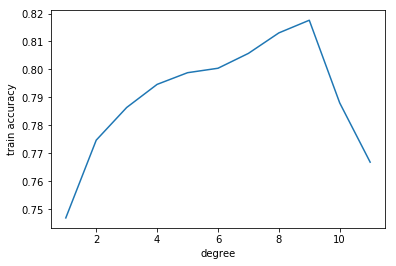

In [38]:
# to do: implement cross validation
results=[]
for j in range(1,12):
    phi_train=build_polinomial(x_train,j,nmc_tr)
    loss,w=least_squares(y_train,phi_train)
    result=(y_train==(phi_train.dot(w)>0.5)).sum()/y_train.shape[0]
    results.append(result)
plt.figure
plt.plot(range(1,12),results)
plt.xlabel('degree')
plt.ylabel('train accuracy')
plt.show()

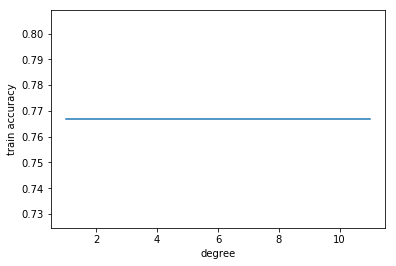

In [37]:
plt.show()

In [7]:
def nan_converter(x,nm=-999,direction=True):
    """convert the not measured elements of the matrix in nan, 
    if direction=False the opposite conversion is made"""
    if direction:
        inds=np.where(x[:,:]==nm)
        x[inds]=np.nan
    else:
        inds=np.where(np.isnan(x))
        x[inds]=nm
    return x
        

In [5]:
def find_cluster(x_bool):
    v_bool=x_bool.sum(0)
    nb_cluster=0
    index_clusters=[]
    while np.max(v_bool)>0:
        index_clusters.append(np.argmax(v_bool))
        nb_cluster+=1
        v_bool=v_bool*(v_bool[:]!=np.max(v_bool))
    return nb_cluster, index_clusters

In [17]:
def cleaning_function(x,nm=-999):
    # nm= not_measured
    x_bool=x[:,:]==nm
    nb_cluster,index_clusters=find_cluster(x_bool)
    v=x[:,index_clusters]!=nm
    x=np.concatenate((x,v,(np.prod(v,axis=1)).reshape(-1,1)),axis=1)
    inds=np.where(x_bool)
    x[inds]=np.nan
    col_mean=np.nanmean(x,axis=0)
    x[inds]=np.take(col_mean,inds[1])
    return x,nb_cluster

In [24]:
def build_polinomial(x,degree,not_poly_features=0,nm=-999):
    """create polynomial features until specified degree. It doesn't 
    compute the power of the last n columns of the metrix, n specified in 
    not_poly_features"""
    x=nan_converter(x,nm=nm,direction=True)
    phi_list=[np.ones(x.shape[0]).reshape(-1,1)]
    # is it possible to avoid the loop?
    for i in range(1,degree+1):
        phi_list.append(np.power(x[:,0:x.shape[1]-1-not_poly_features],i))
    if not_poly_features>0:
        phi_list.append(x[:,x.shape[1]-1-not_poly_features:])
    phi=np.concatenate(phi_list,axis=1)
    phi=nan_converter(phi,nm=nm,direction=False)
    return phi

In [28]:
x_train,nmc_tr=cleaning_function(x_train,-999)
#x_test,nmc_te=cleaning_function(x_test,-999)
# nmc= nb of not measured column, i.e. columns where 
#it is present at least one not measured element
phi_train=build_polinomial(x_train,4,nmc_tr)

In [277]:
print(x_test[10])

[  1.10539000e+02   2.82000000e+00   6.21360000e+01   1.79753000e+02
   3.25600000e+00   3.37201000e+02  -2.05900000e+00   1.09200000e+00
   2.70180000e+01   2.96802000e+02   3.11000000e-01   1.06700000e+00
   9.99000000e-01   1.07140000e+02   6.76000000e-01  -1.82600000e+00
   3.33680000e+01   7.20000000e-01  -7.34000000e-01   6.73250000e+01
  -7.94000000e-01   3.61566000e+02   2.00000000e+00   1.15867000e+02
  -8.59000000e-01   1.96100000e+00   4.04270000e+01   2.39700000e+00
   1.47900000e+00   1.56294000e+02   1.00000000e+00   1.00000000e+00
   1.00000000e+00   1.00000000e+00]


In [249]:
a=0
a=a+1
a

1

In [48]:
? np.genfromtxt()

In [213]:
np.nan

nan

In [212]:
? np.mean

In [244]:
? np.argmin

In [14]:
a=np.array([1,2,3,4,5])
b=np.concatenate([a.reshape(-1,1),a.reshape(-1,1)],axis=1)
print(b)

[[1 1]
 [2 2]
 [3 3]
 [4 4]
 [5 5]]
